# Sprint 機械学習スクラッチ　クラスタリング

## 目的
スクラッチを通してK-meansを理解する  
クラスタ分析を行う  

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from numpy import linalg as LA

import pandas as pd

## 2.K-meansスクラッチ
K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。  
以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。  

In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """

        #mu_list = np.zeros((self.n_init, self.n_clusters))
        #print("mu_list.shape", mu_list.shape)

        for i in range(self.n_init):
            # muの初期化
            mu = self.mu_ini(X, self.n_clusters)
            for j in range(self.max_iter):
                # 更新前の保存
                #rnk_copy = rnk.copy()
                mu_copy = mu.copy()

                # 更新
                rnk = self.distribute_to_clusters(X, mu)
                mu = self.move_mu(X, rnk, mu)

                # 重心の差が指定した許容値以下になると終了
                # これであっているのか？
                diff_mu_center = LA.norm(mu_copy - mu, ord=2)
                if diff_mu_center <= self.tol:
                    # 更新前に戻す必要ある？
                    #rnk = self.distribute_to_clusters(X, mu)
                    #mu = self.move_mu(X, rnk, mu)
                    break

            # muの記録
            # 記録する必要ないかも
            #mu_list[i] = mu
            #print('i, j', i, j)

            # SSEの最小値
            if i == 0:
                self.best_mu = mu.copy()
                self.best_sse = compute_sse(X, mu, rnk)
            elif self.best_sse > compute_sse(X, mu, rnk):
                self.best_mu = mu.copy()
                self.best_sse = compute_sse(X, mu, rnk)

        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        """

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """

        rnk = self.distribute_to_clusters(X, self.best_mu)
        clusters_index = np.argmax(rnk, axis=1)

        return clusters_index

    def mu_ini(self, X, k):
        # 重複なし
        return X[np.random.choice(np.arange(X.shape[0]), k, replace=False)]

    # 【問題2】SSEを求める関数の作成
    def compute_sse(self, X, mu, rnk):
        # for使いたくない
        sse = 0
        for n in range(lX.shape[0]):

            for k in range(mu.shape[0]):
                #sse += rnk[n, k] * (X[n] - mu[k])**2
                sse += rnk[n, k] * LA.norm(X[n] - mu[k], ord=2)**2

        return sse

    def distribute_to_clusters(self, X, mu):
        #　どのクラスタに属しているかフラグ、初期化
        rnk = np.zeros([X.shape[0], mu.shape[0]])
        #　ユークリッド距離の計算結果、初期化
        norm_X_mu = np.zeros([X.shape[0], mu.shape[0]])

        # サンプルごと
        for n in range(X.shape[0]):
            # クラスタごと
            for k in range(mu.shape[0]):
                norm_X_mu[n, k] = LA.norm(X[n] - mu[k], ord=2)
        # for使いたくないけど、お腹痛いから使う
        for k in range(mu.shape[0]):
            rnk[k == np.argmin(norm_X_mu, axis=1), k] = 1
        return rnk

    def move_mu(self, X, rnk, mu):
        # それぞれのクラスタについてrnkにフラグが立っているサンプルのXの値の平均をとり中心点とする
        for k in range(mu.shape[0]):
            mu[k] = np.mean(X[rnk[:, k].astype(bool)], axis=0)
        return mu

### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。  
このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。

In [3]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

## 【問題1】中心点の初期値を決める
入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。
最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。
K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [4]:
def mu_ini(X, k):
    return X[np.random.choice(np.arange(X.shape[0]), k, replace=False)] # 重複なし    

In [5]:
X[:10]

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043]])

In [6]:
mu = mu_ini(X, 3)

In [7]:
mu

array([[ 1.00952869,  4.45502328],
       [-0.565433  ,  3.65813966],
       [ 1.46870582,  1.86947425]])

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。
K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。
S
S
E
=
N
∑
n
=
1
  
K
∑
k
=
1
 
r
n
k
∥
X
n
−
μ
k
∥
2
n
 : データ点のインデックス
k
 : クラスタのインデックス
X
n
 : 
n
番目のデータ点
μ
k
 : 
k
番目の中心点
r
n
k
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0

In [8]:
# 仮にrnkのリストを作る
rnk = np.zeros([X.shape[0], mu.shape[0]])

In [9]:
# rnk

In [10]:
# 仮にrnkのリストを作る
#rnk = np.zeros([X.shape[0], mu.shape[0]])


# 【問題2】SSEを求める関数の作成
def compute_sse(X, mu, rnk):
    # for使いたくない
    sse = 0
    for n in range(X.shape[0]):
        
        for k in range(mu.shape[0]):
            #sse += rnk[n, k] * (X[n] - mu[k])**2
            sse += rnk[n, k] * LA.norm(X[n] - mu[k], ord=2)**2
            
    return sse

In [11]:
# 仮にrnkのリストを作る
#rnk = np.zeros([X.shape[0], mu.shape[0]])


# 【問題2】SSEを求める関数の作成
def compute_sse(X, mu, rnk):
    # for使いたくない
    sse = 0
    for n in range(X.shape[0]):
        
        for k in range(mu.shape[0]):
            #sse += rnk[n, k] * (X[n] - mu[k])**2
            sse += rnk[n, k] * LA.norm(X[n] - mu[k], ord=2)**2
            
    return sse

In [12]:
compute_sse(X, mu, rnk)

0.0

## クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。
中心点 
μ
k
 を固定した上で 
S
S
E
 を最小化する クラスタの割り当て 
r
n
k
 を選ぶ。
クラスタの割り当て 
r
n
k
 を固定した上で 
S
S
E
 を最小化する 中心点 
μ
k
 を選ぶ。
最初の中心点 
μ
k
 は問題1で作成した初期値です。
順番に見ていきます。

## 【問題3】クラスタへの割り当て
全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。
K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。
∥
q
−
p
∥
=
√
(
q
−
p
)
⋅
(
q
−
p
)
NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。
numpy.linalg.norm — NumPy v1.17 Manual
中心点 
μ
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [13]:
LA.norm(X[0] - mu[0], ord=2)

0.79575417450003

In [14]:
def distribute_to_clusters(X, mu):
    #　どのクラスに所属しているかフラグ、初期化
    rnk = np.zeros([X.shape[0], mu.shape[0]])
    #　ユークリッド距離の計算結果、初期化
    norm_X_mu= np.zeros([X.shape[0], mu.shape[0]])
    
    # サンプルごと
    for n in range(X.shape[0]):
        # クラスごと
        for k in range(mu.shape[0]):
            norm_X_mu[n, k] = LA.norm(X[n] - mu[k], ord=2)
    # for使いたくないけど、お腹痛いから使う
    for k in range(mu.shape[0]):
        rnk[k==np.argmin(norm_X_mu, axis=1), k] = 1
    return rnk

In [15]:
rnk = distribute_to_clusters(X, mu)

In [16]:
#rnk

## 【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。
クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [17]:
def move_mu(X, rnk, mu): # rnk, muはインスタンス変数として定義するので引数から除くことになる
    #mu = np.zeros(mu.shape[0]) # 初期化も不要になる
    for k in range(mu.shape[0]):
        #print(rnk[:, k])
        #print(X[rnk[:, k].astype(bool)])
        #mu[k] = np.average(X[rnk[:, k].astype(bool)], axis=0)
        #mu[k] = X[rnk[:, k].astype(bool)].mean(axis=0)
        #print(np.mean(X[rnk[:, k].astype(bool)], axis=0))
        mu[k] = np.mean(X[rnk[:, k].astype(bool)], axis=0)
    return mu

In [18]:
mu = move_mu(X, rnk, mu)

In [19]:
mu

array([[ 0.0667074 ,  5.97007925],
       [-1.37744392,  4.03827339],
       [ 1.99186903,  0.96561071]])

### 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。
次のどれかの条件を満たしたらこれを止めます。
繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 
μ
k
 と重心の差が指定した許容値以下になる。（雛形では引数tol）

In [20]:
rnk

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [21]:
np.argmax(rnk, axis=1)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

### 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。
データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。
具体的には次のことです。
データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。

In [22]:
model = ScratchKMeans(4, 100, 10, 0.01)
model.fit(X)

In [23]:
model.best_mu

array([[-1.26811733,  7.76378266],
       [-1.47935679,  3.11716896],
       [ 1.99186903,  0.96561071],
       [ 0.92578447,  4.32475792]])

In [24]:
model.best_sse

48.633783207064035

In [25]:
y_pred = model.predict(X)

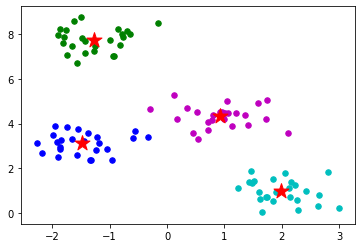

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


y = y_pred
mu = model.best_mu
plot_colors =["g", "b", "c", "m", "y", "k"]

for i in np.unique(y):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=plot_colors[i],  s=30)
    plt.scatter(mu[i, 0], mu[i, 1],  color="r", marker="*", s=250)
plt.show()

In [27]:
mu

array([[-1.26811733,  7.76378266],
       [-1.47935679,  3.11716896],
       [ 1.99186903,  0.96561071],
       [ 0.92578447,  4.32475792]])

### 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。  
SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。  

In [28]:
# クラスを作りたい
#あとで

max_cluster = 10
array_sse = np.zeros(max_cluster)
for i in range(1, max_cluster):
    
    model = ScratchKMeans(i, X.shape[0], 100, 0.01)
    model.fit(X)
    array_sse[i] = model.best_sse
    

/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ryuji_sato/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [29]:
array_sse_100 = array_sse.copy()

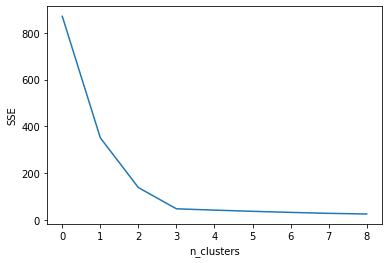

In [30]:
plt.xlabel("n_clusters")
plt.ylabel("SSE")

plt.plot(array_sse_100[1:10])

### 【問題9】（アドバンス課題）シルエット図 →パス
k
 を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。
Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。
silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数
silhouette_avg : float、シルエット係数の平均値
y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名
cluster_labels : list、クラスタのラベル名のリスト
n_clusters : int、クラスタ数
n
 番目のデータ点に対するシルエット係数 
s
n
 は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。
s
n
=
b
n
−
a
n
m
a
x
(
b
n
,
a
n
)
a
n
 : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。
b
n
 : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。
乖離度 
b
 が大きく、凝集度 
a
 が小さい時が理想的であり、シルエット係数 
s
 は1に近くなります

## 3.クラスタ分析

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。
UCI Machine Learning Repository: Wholesale customers Data Set
Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [31]:
data = pd.read_csv("Sprint7/Wholesale customers data.csv")
display(data.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [32]:
data =data.drop(['Region', 'Channel'], axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### 対数化する

In [33]:
data = np.log10(data)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.44237417 0.71894523 0.83511865 0.93129585 0.97705265 1.        ]


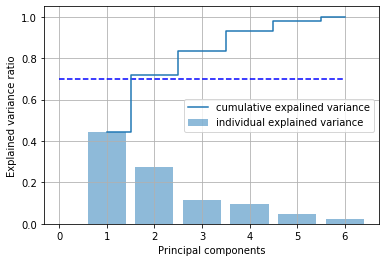

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [36]:

max_cluster = 10
array_sse = np.zeros(max_cluster)
for i in range(1, max_cluster):
    
    model = ScratchKMeans(i, data_pca.shape[0], 100, 0.01)
    model.fit(data_pca)
    array_sse[i] = model.best_sse
    

In [37]:
array_sse_20 = array_sse.copy()

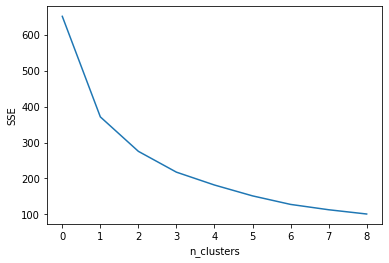

In [47]:
plt.xlabel("n_clusters")
plt.ylabel("SSE")

plt.plot(array_sse_20[1:])

SSE値が著しく下がっているところはどこ？

In [39]:
best_n_clusters = 3
model = ScratchKMeans(best_n_clusters, data_pca.shape[0], 100, 0.01)
model.fit(data_pca)

In [40]:
y_pred_wcd = model.predict(data_pca)

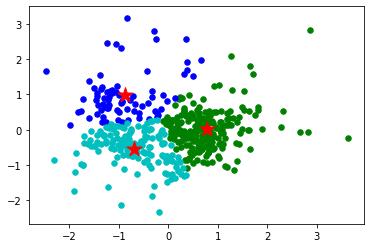

In [41]:
y = y_pred_wcd
mu = model.best_mu
plot_colors =["g", "b", "c", "m", "y", "k"]

for i in np.unique(y):
    plt.scatter(data_pca[y==i, 0], data_pca[y==i, 1], color=plot_colors[i],  s=30)
    plt.scatter(mu[i, 0], mu[i, 1],  color="r", marker="*", s=250)
plt.show()

ソース：  

Margarida GMS Cardoso、 margarida.cardoso '@' iscte.pt 、ISCTE-IUL、リスボン、ポルトガル  

  
データセット情報：  
  
データセットに関するすべての関連情報を提供します。  
  
  
属性情報：  
  
1）フレッシュ：新鮮な製品の年間支出（mu）（連続）;   
2）MILK：乳製品の年間支出（mu）（連続）;   
3）食料品：食料品の年間支出（mu）（連続）;   
4）FROZEN：冷凍製品の年間支出（mu）（連続）   
5）DETERGENTS_PAPER：洗剤と紙製品の年間支出（mu）（連続）   
6）デリカテッセン：年間消費（mu）およびデリカテッセン製品（継続）。   
7）CHANNEL：customersâ€™チャネル-Horeca（ホテル/レストラン/カフェ）またはRetailチャネル（公称）   
8）地域：顧客–地域– Lisnon、Oporto、またはその他（公称）   
記述統計：   

（最小、最大、平均、標準偏差）   
フレッシュ（3、112151、12000.30、12647.329）   
ミルク（55、73498、5796.27、7380.377）   
食料品（3、92780、7951.28、9503.163）   
冷凍（25、60869、3071.93、4854.673）   
DETERGENTS_PAPER（3、40827、2881.49、4767.854）   
デリカテッセン（3、47943、1524.87、2820.106）   



クラスター数を増やせばSSEの値は下がっていくが、クラスタ分類後の分析が煩雑になることを考えあまり多くはしたくない。
グラフからエルボー法より4個で試してみる

In [50]:
skm_2_clusters = ScratchKMeans(4, data_pca.shape[0], 100, 0.01)
skm_2_clusters.fit(data_pca)
y_pred_data2 = skm_2_clusters.predict(data_pca)

### 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

In [52]:
data = pd.read_csv("Sprint7/Wholesale customers data.csv")

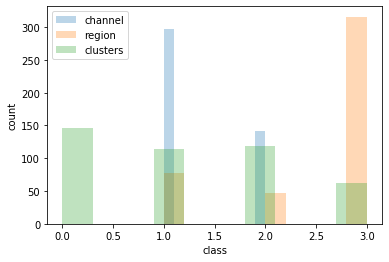

In [53]:
plt.hist(data.loc[:,"Channel" ], alpha = 0.3, label="channel")
plt.hist(data.loc[:,"Region" ], alpha = 0.3, label="region")
plt.hist(y_pred_data2, alpha = 0.3, label="clusters")
plt.xlabel("class")
plt.ylabel("count")
plt.legend()
plt.show()

channel:2, region:2, cluster:2の集団は比較的数が似ている

## 【問題12】卸売業者にとって有益な情報¶
卸売業者にとって有益な情報を探し出し文章にまとめてください。

In [54]:
data_2 = data.copy()
data_2["cluster"] = y_pred_data2
data_2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,2
6,2,3,12126,3199,6975,480,3140,545,2
7,2,3,7579,4956,9426,1669,3321,2566,2
8,1,3,5963,3648,6192,425,1716,750,2
9,2,3,6006,11093,18881,1159,7425,2098,2


In [55]:
data_2_groupby_cluster = data_2.groupby(["cluster"]).mean().round()
data_2_groupby_cluster


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.0,3.0,19255.0,4041.0,4358.0,5582.0,639.0,2033.0
1,1.0,3.0,8549.0,1643.0,1956.0,2281.0,282.0,578.0
2,2.0,3.0,11475.0,11259.0,15663.0,2044.0,6781.0,2227.0
3,2.0,3.0,2262.0,7171.0,12760.0,574.0,5520.0,734.0


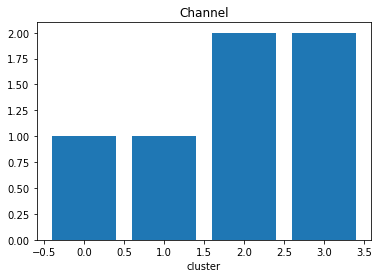

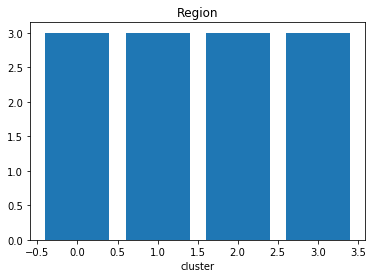

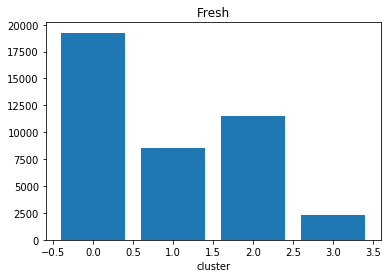

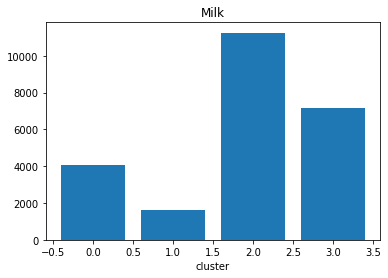

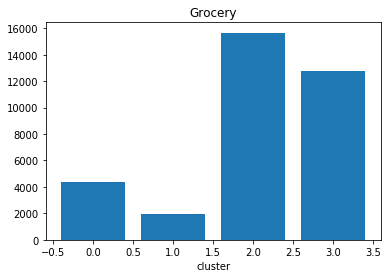

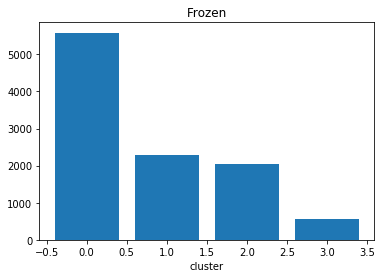

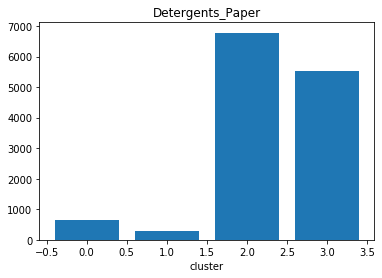

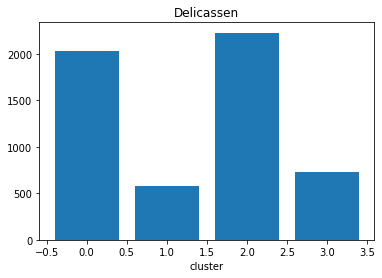

In [56]:
for col in data_2_groupby_cluster :
    plt.title(col)
    plt.xlabel("cluster")
    plt.bar(x = [0, 1, 2, 3], height=data_2_groupby_cluster[col])
    plt.show()

cluster:１の人は, cluster:2, cluster3に比べ消費しやすい  
特にDelicassenは顕著に高い  
cluster:1の人はchannel:1の人が多い  
channel:2の中でcluster:0の人はDetergents_Paperをよく購入する、しかしregion:3の人はあまり購入しない。  
  
  
cluster:1の人はchannel:1の人が多く、このセクションの購入が多いため、ホテル・レストランに向けたプロモーションを強化する  
channel:2でcluster:0の人のDetergents_Paperの購入が多い、一方region:3の人が高くない。  
なので、リスボン・ポルトでの個人向けDetergents_Paperの広告を増やす、特にcluster:0の人の特徴に合わせて行う。  